# image segmentation in python
a notebook to learn a few basics about image segmentation

In [18]:
from matplotlib import pyplot as plt
from aicsimageio import AICSImage
from skimage import filters
from skimage.filters import try_all_threshold

as before we will load the same gephyrin image

In [2]:
# load an nd2 file
img = AICSImage('../data/nd2/WT_001.nd2')
data = img.get_image_data("TCZYX")  # Choose the correct dimension order

# Pick the first timepoint and z-slice
t_index = 0
z_index = 0

# Extract each channel slice (assume 3 channels, for example)
channel_0 = data[t_index, 0, z_index, :, :]
channel_1 = data[t_index, 1, z_index, :, :]
channel_2 = data[t_index, 2, z_index, :, :]

gphn = channel_0
plt.imshow(gphn, cmap='Greys')

to separate the image into foreground and background, we need to define a cutoff intensity value

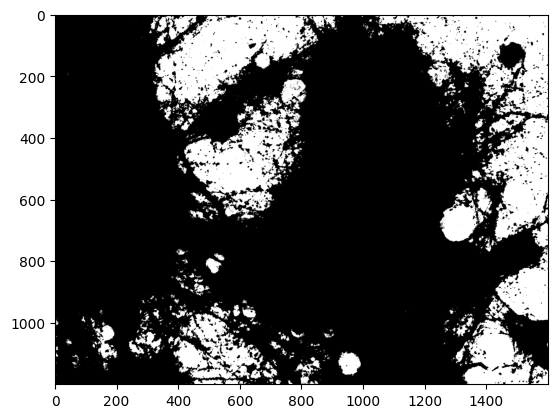

In [9]:
threshold = 400

binary_image = gphn >= threshold

plt.imshow(binary_image, cmap='Greys')

there are many algorithms that can be used to calculate the threshold value, e.g. "Otsu" is one method

In [15]:
threshold = filters.threshold_otsu(gphn)

threshold

1035

as before we can use this computed value instead of an arbitrary chosen one to binarize the image

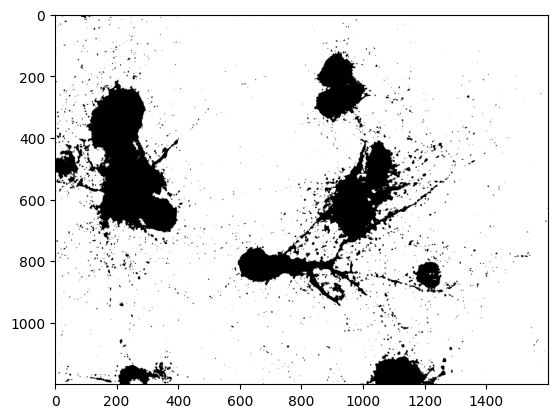

In [16]:
binary_image = gphn >= threshold

plt.imshow(binary_image, cmap='Greys')

in order to test how well this worked, we can plot the contour of the binary image onto the original

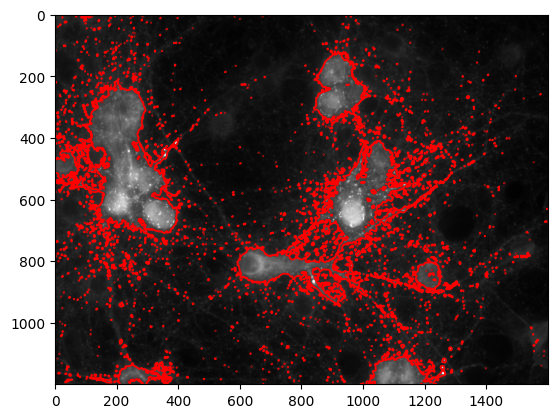

In [17]:
# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(gphn, cmap=plt.cm.gray)
axes.contour(binary_image, [0.5], linewidths=1.2, colors='r')

we can test multiple thresholding methods to see how they display diffrent properties of the original image

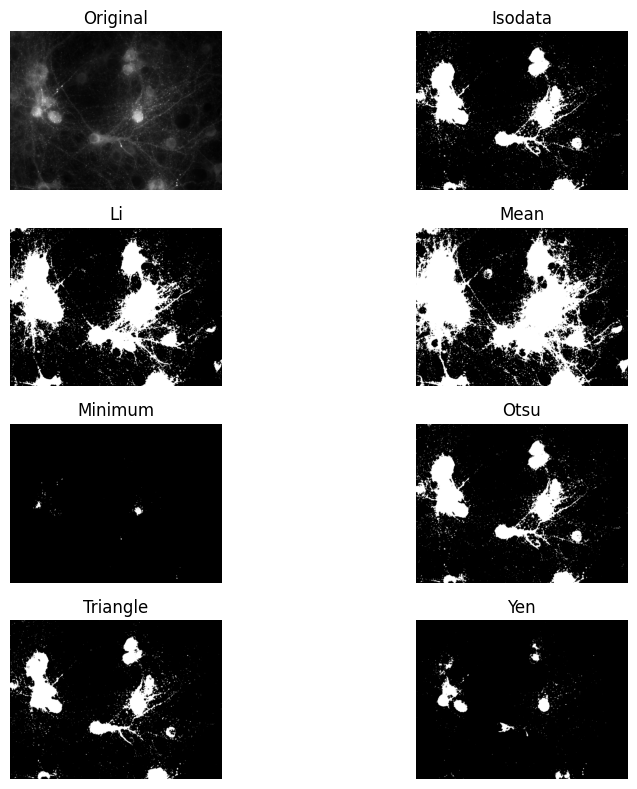

In [19]:
fig, ax = try_all_threshold(gphn, figsize=(10, 8), verbose=False)
plt.show()

finally we can test how image preprocessing can affect thresholding

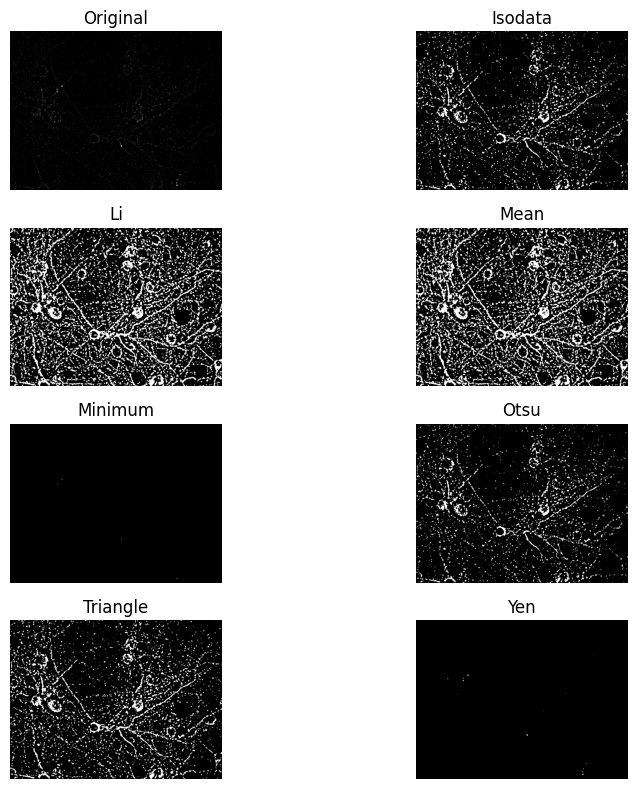

In [20]:
def sub_to_zero(a, b):
    # Element-wise subtraction and maximum with zero
    return np.maximum(a - b, 0)


# Process Gphn channel (Difference of Gaussian)
low = gaussian(gphn, sigma=2, preserve_range=True)
high = gaussian(gphn, sigma=10, preserve_range=True)

dog = sub_to_zero(low,high)

fig, ax = try_all_threshold(dog, figsize=(10, 8), verbose=False)
plt.show()

let's pick Otsu compare the effect of preprocessing

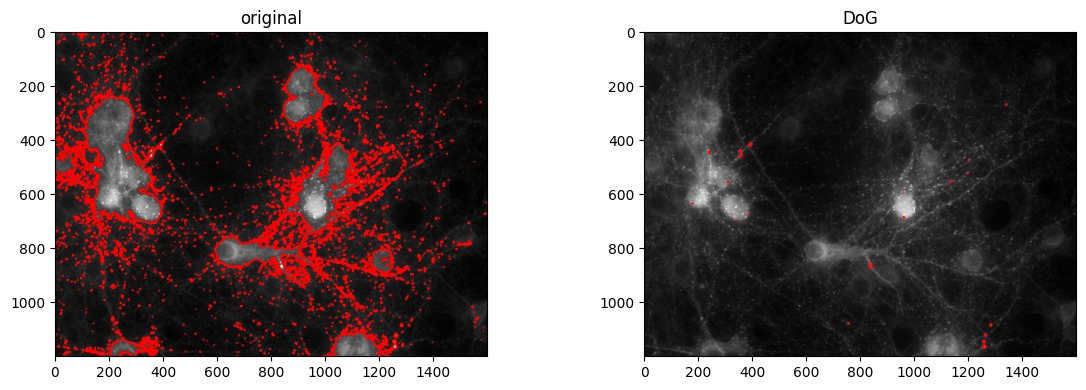

In [23]:
threshold = filters.threshold_otsu(gphn)
binary_image = gphn >= threshold

threshold_dog = filters.threshold_otsu(dog)
binary_image_dog = dog >= threshold



fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(gphn, cmap=plt.cm.gray)
axes[0].contour(binary_image, [0.5], linewidths=1.2, colors='r')
axes[0].set_title("threshold on original")

axes[1].imshow(gphn, cmap=plt.cm.gray)
axes[1].contour(binary_image_dog, [0.5], linewidths=1.2, colors='r')
axes[1].set_title("threshold on DoG")

plt.tight_layout()
plt.show()
